In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import shap


data = pd.read_csv(r'C:\Users\Admin\Desktop\XAI HEART ATTACK PREDICTION\heart.csv')

# Encode categorical variables 
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print("Random Forest Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)




Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8695652173913043
Random Forest Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.84      0.84      0.84        77
   Heart Disease       0.89      0.89      0.89       107

        accuracy                           0.87       184
       macro avg       0.87      0.87      0.87       184
    weighted avg       0.87      0.87      0.87       184

Confusion Matrix:
[[65 12]
 [12 95]]


Feature: Age, SHAP Value: 0.02652861640694225
Feature: RestingBP, SHAP Value: -0.004378737539343727
Feature: Cholesterol, SHAP Value: 0.06298580171722895
Feature: MaxHR, SHAP Value: 0.04567372303257177
Feature: Oldpeak, SHAP Value: 0.04609677294160901
Feature: Sex_M, SHAP Value: 0.023963192099545897
Feature: ChestPainType_ATA, SHAP Value: 0.01951487979442436
Feature: ChestPainType_NAP, SHAP Value: 0.017376136500800082
Feature: ChestPainType_TA, SHAP Value: 0.002185575503642201
Feature: FastingBS_1, SHAP Value: -0.019819025547847056
Feature: RestingECG_Normal, SHAP Value: -0.002120877287766318
Feature: RestingECG_ST, SHAP Value: 0.0033381577573919413
Feature: ExerciseAngina_Y, SHAP Value: 0.10231855830791746
Feature: ST_Slope_Flat, SHAP Value: -0.05949316796147827
Feature: ST_Slope_Up, SHAP Value: 0.08607667732296008


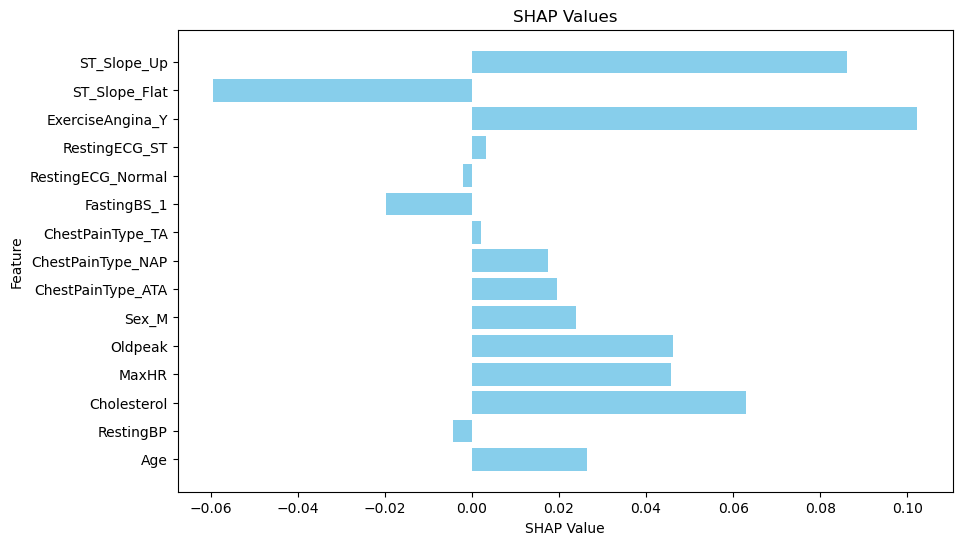

In [29]:
# Calculate individual SHAP values for the selected instance
explainer = shap.TreeExplainer(best_rf_classifier)
selected_instance = X_test.iloc[9]
individual_shap_values = explainer.shap_values(selected_instance)

for feature, shap_value in zip(X.columns, individual_shap_values[1]):
    print(f"Feature: {feature}, SHAP Value: {shap_value}")

import matplotlib.pyplot as plt

feature_names = X.columns
shap_values_instance = individual_shap_values[1]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, shap_values_instance, color='skyblue')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.title('SHAP Values')
plt.show()


In [15]:
import numpy as np

# Calculate SHAP values for the first 10 rows
shap_values = explainer.shap_values(X_test.iloc[:10])

mean_shap_values = np.mean(shap_values, axis=0)

for feature, mean_shap_value in zip(X.columns, mean_shap_values[1]):
    print(f"Feature: {feature}, Mean SHAP Value: {mean_shap_value}")


Feature: Age, Mean SHAP Value: -1.1872013788716274e-17
Feature: RestingBP, Mean SHAP Value: 2.7755575615628914e-17
Feature: Cholesterol, Mean SHAP Value: -6.938893903907228e-18
Feature: MaxHR, Mean SHAP Value: 4.85722573273506e-17
Feature: Oldpeak, Mean SHAP Value: 4.336808689942018e-18
Feature: Sex_M, Mean SHAP Value: -3.122502256758253e-17
Feature: ChestPainType_ATA, Mean SHAP Value: 5.898059818321144e-17
Feature: ChestPainType_NAP, Mean SHAP Value: 1.1796119636642288e-16
Feature: ChestPainType_TA, Mean SHAP Value: -2.168404344971009e-19
Feature: FastingBS_1, Mean SHAP Value: 2.6020852139652106e-18
Feature: RestingECG_Normal, Mean SHAP Value: 9.75781955236954e-19
Feature: RestingECG_ST, Mean SHAP Value: -7.589415207398531e-19
Feature: ExerciseAngina_Y, Mean SHAP Value: -1.3877787807814457e-17
Feature: ST_Slope_Flat, Mean SHAP Value: 4.163336342344337e-16
Feature: ST_Slope_Up, Mean SHAP Value: 3.3306690738754696e-16


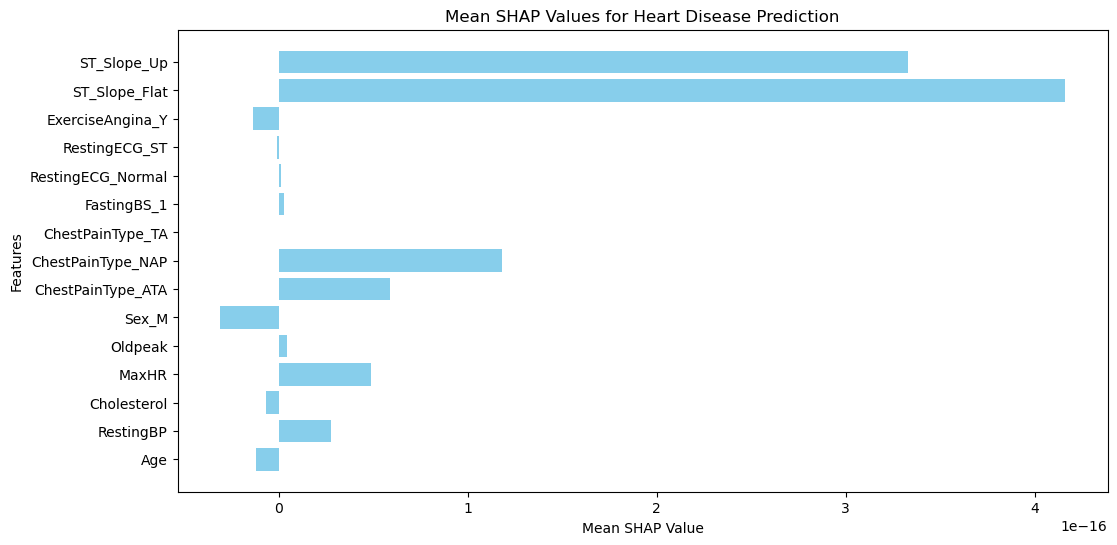

In [16]:
import matplotlib.pyplot as plt

features = X.columns

# Mean SHAP values
mean_shap_values = mean_shap_values[1]  # Considering SHAP values for Heart Disease class (1)

plt.figure(figsize=(12, 6))
plt.barh(features, mean_shap_values, color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Features')
plt.title('Mean SHAP Values for Heart Disease Prediction')
plt.show()


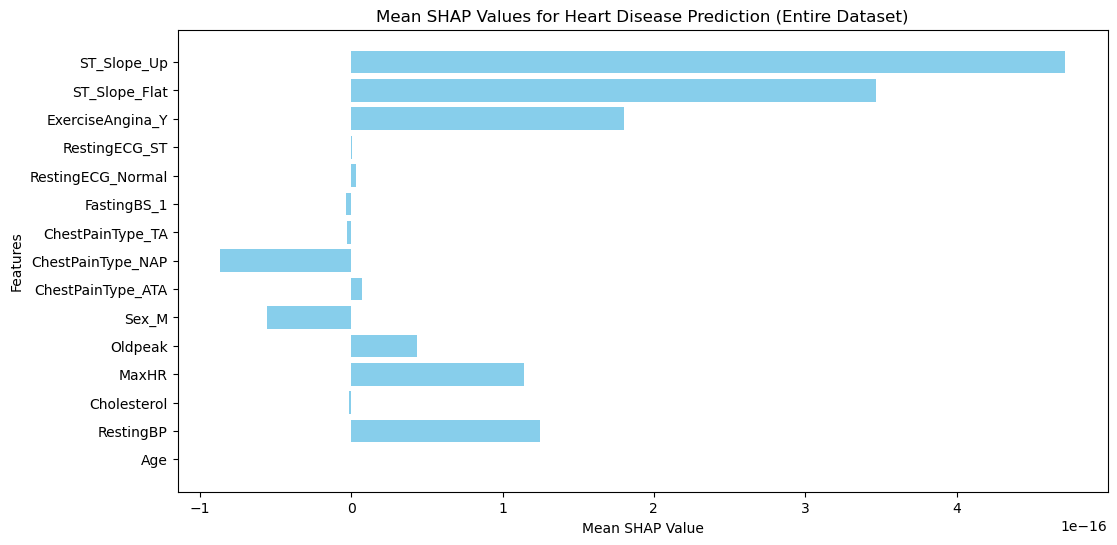

In [17]:
import numpy as np
import matplotlib.pyplot as plt

shap_values = explainer.shap_values(X)

mean_shap_values = np.mean(shap_values, axis=0)

# Feature names
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, mean_shap_values[1], color='skyblue')  # Considering SHAP values for Heart Disease class (1)
plt.xlabel('Mean SHAP Value')
plt.ylabel('Features')
plt.title('Mean SHAP Values for Heart Disease Prediction (Entire Dataset)')
plt.show()


Feature: Age, Mean SHAP Value: 6.776263578034403e-21
Feature: RestingBP, Mean SHAP Value: 1.249000902703301e-16
Feature: Cholesterol, Mean SHAP Value: -1.734723475976807e-18
Feature: MaxHR, Mean SHAP Value: 1.1449174941446927e-16
Feature: Oldpeak, Mean SHAP Value: 4.336808689942018e-17
Feature: Sex_M, Mean SHAP Value: -5.551115123125783e-17
Feature: ChestPainType_ATA, Mean SHAP Value: 6.938893903907228e-18
Feature: ChestPainType_NAP, Mean SHAP Value: -8.673617379884035e-17
Feature: ChestPainType_TA, Mean SHAP Value: -2.927345865710862e-18
Feature: FastingBS_1, Mean SHAP Value: -3.469446951953614e-18
Feature: RestingECG_Normal, Mean SHAP Value: 3.469446951953614e-18
Feature: RestingECG_ST, Mean SHAP Value: 3.2526065174565133e-19
Feature: ExerciseAngina_Y, Mean SHAP Value: 1.8041124150158794e-16
Feature: ST_Slope_Flat, Mean SHAP Value: 3.469446951953614e-16
Feature: ST_Slope_Up, Mean SHAP Value: 4.718447854656915e-16


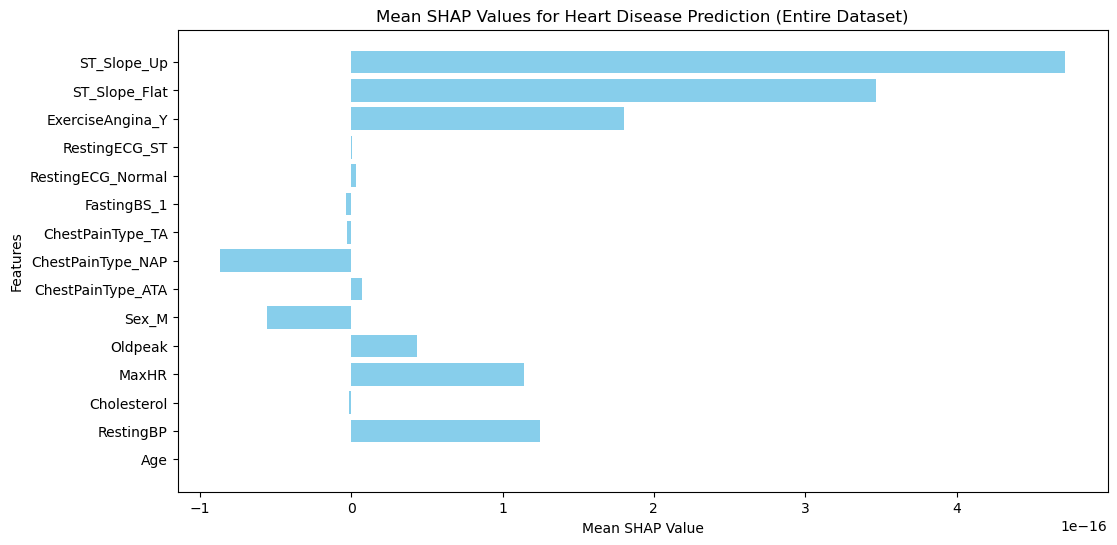

In [19]:
import numpy as np

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

mean_shap_values = np.mean(shap_values, axis=0)

for feature, mean_shap_value in zip(X.columns, mean_shap_values[1]):
    print(f"Feature: {feature}, Mean SHAP Value: {mean_shap_value}")

features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, mean_shap_values[1], color='skyblue')  # Considering SHAP values for Heart Disease class (1)
plt.xlabel('Mean SHAP Value')
plt.ylabel('Features')
plt.title('Mean SHAP Values for Heart Disease Prediction (Entire Dataset)')
plt.show()


Feature: Age, Mean SHAP Value: 0.001204494834359927
Feature: RestingBP, Mean SHAP Value: -0.001592596332283747
Feature: Cholesterol, Mean SHAP Value: 0.003986446685679467
Feature: MaxHR, Mean SHAP Value: -0.00977161850459204
Feature: Oldpeak, Mean SHAP Value: 0.007760447152864502
Feature: Sex_M, Mean SHAP Value: 0.011485412665065711
Feature: ChestPainType_ATA, Mean SHAP Value: 0.0004176746887224287
Feature: ChestPainType_NAP, Mean SHAP Value: 0.0019448739275125728
Feature: ChestPainType_TA, Mean SHAP Value: -0.0005980758215779018
Feature: FastingBS_1, Mean SHAP Value: 0.0002289471093375093
Feature: RestingECG_Normal, Mean SHAP Value: 0.0013786022164630515
Feature: RestingECG_ST, Mean SHAP Value: -5.691961103905178e-05
Feature: ExerciseAngina_Y, Mean SHAP Value: -0.0007851625670756313
Feature: ST_Slope_Flat, Mean SHAP Value: -0.014508266892508243
Feature: ST_Slope_Up, Mean SHAP Value: 0.001314334342008991


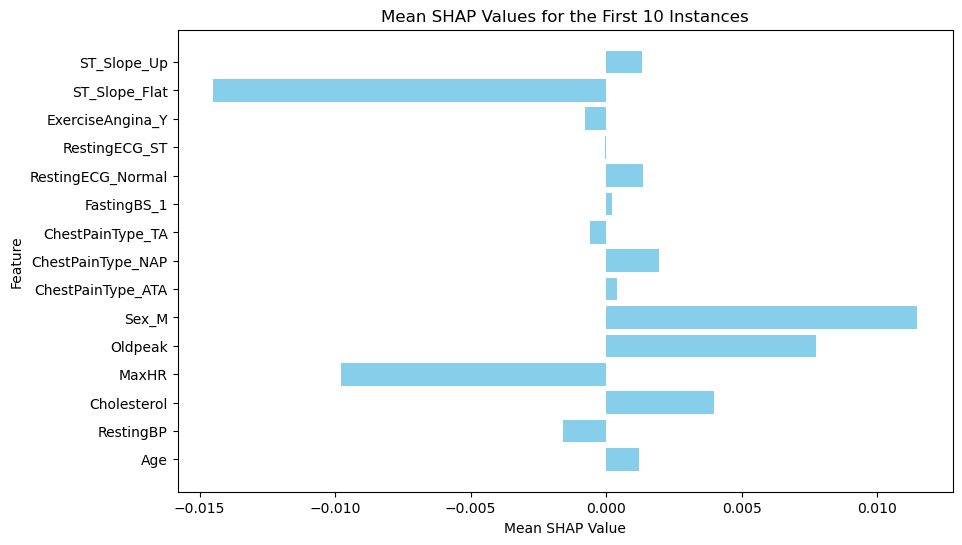

In [32]:
# Calculate individual SHAP values for the first 10 instances
explainer = shap.TreeExplainer(best_rf_classifier)
selected_instances = X_test.iloc[:100]
individual_shap_values = explainer.shap_values(selected_instances)

mean_shap_values = np.mean(individual_shap_values[1], axis=0)

for feature, mean_shap_value in zip(X.columns, mean_shap_values):
    print(f"Feature: {feature}, Mean SHAP Value: {mean_shap_value}")

plt.figure(figsize=(10, 6))
plt.barh(X.columns, mean_shap_values, color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Mean SHAP Values for the First 10 Instances')
plt.show()


Feature: Age, Mean SHAP Value: 0.0012357275131780652
Feature: RestingBP, Mean SHAP Value: -0.0030656865720727253
Feature: Cholesterol, Mean SHAP Value: 0.0066478549820690805
Feature: MaxHR, Mean SHAP Value: -0.008175390986471697
Feature: Oldpeak, Mean SHAP Value: 0.002317240870074437
Feature: Sex_M, Mean SHAP Value: 0.01045335649615947
Feature: ChestPainType_ATA, Mean SHAP Value: 0.0036108827279419833
Feature: ChestPainType_NAP, Mean SHAP Value: 0.0021308506367885964
Feature: ChestPainType_TA, Mean SHAP Value: -0.00020973171064346416
Feature: FastingBS_1, Mean SHAP Value: 0.0011651738098246895
Feature: RestingECG_Normal, Mean SHAP Value: 0.0008294279740852105
Feature: RestingECG_ST, Mean SHAP Value: 5.752892416466182e-05
Feature: ExerciseAngina_Y, Mean SHAP Value: -0.0052388140682842425
Feature: ST_Slope_Flat, Mean SHAP Value: -0.018828763862535604
Feature: ST_Slope_Up, Mean SHAP Value: -0.009644004780667445


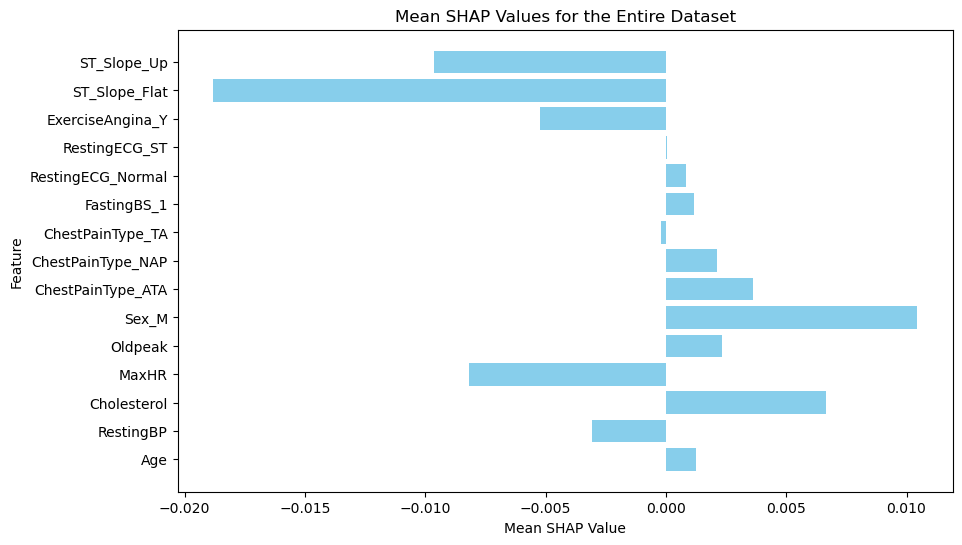

In [31]:
# Calculate individual SHAP values for the entire dataset
explainer = shap.TreeExplainer(best_rf_classifier)
shap_values = explainer.shap_values(X_test)
mean_shap_values = np.mean(shap_values[1], axis=0)
for feature, mean_shap_value in zip(X.columns, mean_shap_values):
    print(f"Feature: {feature}, Mean SHAP Value: {mean_shap_value}")

plt.figure(figsize=(10, 6))
plt.barh(X.columns, mean_shap_values, color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Mean SHAP Values for the Entire Dataset')
plt.show()
